[Table of Contents](table_of_contents.ipynb)

# Topic 6.  Projection Operators

Authors: Sequoia Ploeg & Alexander Petrie     
Email: sequoiap4@gmail.com, alexander.petrie@gmail.com

Dependencies of this file:
* Matplotlib
* NumPy
* ipywidgets

In [1]:
from IPython.display import display
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
slider_mode = False

Useful resources:

https://en.wikipedia.org/wiki/Projection_(linear_algebra)  
https://www.blog.pythonlibrary.org/2018/10/24/working-with-jupyter-notebook-widgets/  
https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html  
https://www.scratchapixel.com/lessons/3d-basic-rendering/perspective-and-orthographic-projection-matrix/projection-matrix-introduction  
https://math.stackexchange.com/questions/404440/what-is-the-equation-for-a-3d-line  
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html  
https://math.stackexchange.com/questions/1140374/finding-the-projection-matrix  
https://mathworld.wolfram.com/ProjectionMatrix.html  
https://cs.appstate.edu/~sjg/class/2240/c7s4.html  
https://math.stackexchange.com/questions/62633/orthogonal-projection-of-a-point-onto-a-line  


##  Introduction

A **projection** is a mapping of some space onto a subspace of the original space. A **projection operator** is a linear operator P that maps a space to the subspace. 

**Insert figure here**

In order for an operator to be a projection operator, it must be idempotent. This means that whenever P is applied twice to any value, it gives the same result as if it were applied just once. i.e. $P^2 = P$. 

One example of a projection is mapping a 3D object onto a 2D subspace. This is done in video games. The graphics are often generated in a 3D environment and they are then projected onto a 2D screen so we can see them. 

There are two kinds of projections:
* **Orthogonal:** A projection is an orthogonal projection if its range and nullspace are orthogonal. Another test is if $P^T = P$. Calculating least squares regressions require orthogonal projections.
* **Oblique:** Non-orthogonal projections are still valid projections, i.e. $P^2 = P$, as will be shown later.

A few notes on the implementation of code examples:  
* The `@` operator is overloaded to represent matrix multiplication within NumPy
* Some of the plotted code blocks contain sliders. In order for the slider for a particular plot to work, its respective code block must be the most recent code block run within the notebook. In other words, when you move on to try out a new plot, just run its associated code block again.

##  Explanation of the theory
Let $W$ be a finite dimentional vector space and $P$ be a projection on $W$. Suppose the subspaces $U$ avnd $V$ are the range and null space of $P$, respectively. 

### Properties of a projection operator
* $P^2 = P$ ($P$ is *idempotent*)
    * This means that if you use $P$ to try to operate on a value that has already been operated on by $P$, the value will not change.      
    
    
* $\forall \, x \in U \, \colon \, Px = x$
    * This means that if $P$ operates on some value in the range space of $P$, that value does not change.
    
    
* There is a direct sum $W = U \bigoplus V$. Every vector x in $W$ my be decomposed as $x = u + v$ where $u$ is in range of $P$ and $v$ is in the null space of $P$
    * In other words: if $P\,\colon\;W\rightarrow W$, then $W = \mathcal{R}(P) + \mathcal{N}(P)$
    
    
* The range and null space of a projection are complementary, meaning they are disjoint.


* If $P$ is a projection, $(I - P)$ is also a projection.
    * Proof: 
    $$
    \begin{split}
        (I-P)^2 &= (I-P)(I-P) \\
        &= I-P-P+P^2 \\
        &= I - P - P + P \\
        &= I-P \\
    \end{split}
    $$
    
    
* $P$ projects onto the range space $U$.  $(I-P)$ projects onto the null space $V$.

### Orthogonal projections
When $U$ (range space of $P$) and $V$ (null space of $P$) are orthogonal subspaces, ($\mathcal{R}(P)\, \bot\,\mathcal{N}(P)$), $P$ is an **orthogonal projection**. Orthogonal projections are very useful because if you can orthgonally project a value onto a subspace, that projection is the closest representation of the value on that subspace (see engineering example at the end). 

## Simple Numerical Example

### Example 1

This first example is an orthogonal projection of a vector in $\mathbb{R}^2$ to the line y = 0. It orthogonally projects all points in $\mathbb{R}^2$ to this line, meaning the result of the projection is the closest point on the line $y=0$ to the initial point. The "physical" intuition would be that, for any point in $\mathbb{R}^2$, the closest point to the line $y=0$ is found by dropping a vertical line from that point to the x-axis. Therefore, in this example, the projection matrix simply "selects" out the x-component of the vector representing that point, discarding the y-component.

The projection matrix is:
$$
   P=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right]
$$

We can verify it is a projection by computing $P^2$ and showing it is equal to $P$:

$$
  P^2 = P \cdot P = \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right] \cdot \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 \cdot 1 + 0 \cdot 0 & 1 \cdot 0 + 0 \cdot 0 \\
   0 \cdot 1 + 0 \cdot 0 & 0 \cdot 0 + 0 \cdot 0 \\
  \end{array} } \right] = \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right]
$$

The first plot shows the projection of ten randomly generated $(x,y)$ coordinate pairs. The second plot allows you to change the x and y points in the sliders and it will show how they project onto the line y = 0.

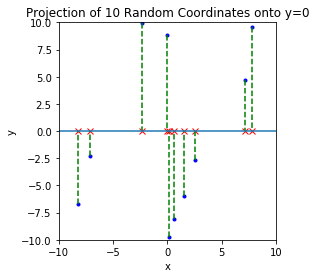

In [11]:
x = ((np.random.rand(10)*2)-1)*10
y = ((np.random.rand(10)*2)-1)*10
pair = zip(x, y)

# The projection matrix
P = np.array([[1, 0],
              [0, 0]])

for item in pair:
    x, y = item

    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot(x, y, 'b.')
    plt.plot(Pz[0], Pz[1], 'rx')
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed')

plt.plot([-10,10],[0,0])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title("Projection of 10 Random Coordinates onto y=0")
plt.show()

In [10]:
# The projection matrix
P = np.array([[1, 0],
              [0, 0]])
              
def update(x, y):
    """
    Projects the point (x, y) onto the line y=0 and updates a plot.
    """
    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed', linewidth = 3, 
            marker='o', markerfacecolor='blue', markersize=8)
    plt.plot([-10,10],[0,0])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('square')
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

widgets.interact(update, x=widgets.FloatSlider(value=-2, min=-10, max=10, step=0.1, description='x'), y=widgets.FloatSlider(value=5, min=-10, max=10, step=0.1, description='y'))

A Jupyter Widget

<function __main__.update>

### Example 2

This example is similar to the first in that it maps all points in $\mathbb{R}^2$ to a line. However, now the line is y = x. 
The projection matrix in this case is: 

$$
   P=
  \left[ {\begin{array}{cc}
   0.5 & 0.5 \\
   0.5 & 0.5 \\
  \end{array} } \right]
$$    
You can change the x and y points in the code and it will show how they project onto the line y = x.

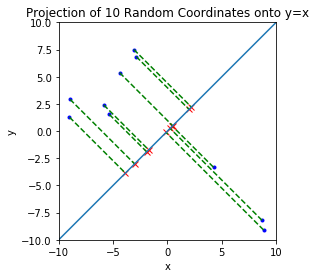

In [15]:
x = ((np.random.rand(10)*2)-1)*10
y = ((np.random.rand(10)*2)-1)*10
pair = zip(x, y)

# The projection matrix
P = np.array([[0.5, 0.5],
              [0.5, 0.5]])

for item in pair:
    x, y = item

    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot(x, y, 'b.')
    plt.plot(Pz[0], Pz[1], 'rx')
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed')

plt.plot([-10,10],[-10,10])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title("Projection of 10 Random Coordinates onto y=x")
plt.show()

In [16]:
# The projection matrix
P = np.array([[0.5, 0.5],
              [0.5, 0.5]])

def update(x, y):
    """
    Projects the point (x, y) onto the line y=0 and updates a plot.
    """
    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = x
    Pz = P @ z

    # Plot the result
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed', linewidth = 3, 
            marker='o', markerfacecolor='blue', markersize=8)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot([-10,10],[-10,10])
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.axis('square')

widgets.interact(update, x=widgets.FloatSlider(value=-5, min=-10, max=10, step=0.1, description='x'), y=widgets.FloatSlider(value=8, min=-10, max=10, step=0.1, description='y'))

A Jupyter Widget

<function __main__.update>

### Example 3

In this third example, we again project onto the line $y=0$ but in some direction defined by a variable $\alpha$. This creates an oblique projection. The projection matrix is

$$
P=
  \left[ {\begin{array}{cc}
   1 & \alpha \\
   0 & 0 \\
  \end{array} } \right]
$$

We can prove this is an operator by showing that $P^2 = P$:

$$
P^2 = P \cdot P =
  \left[ {\begin{array}{cc}
   0 & 0 \\
   \alpha & 1 \\
  \end{array} } \right]
  \cdot \left[ {\begin{array}{cc}
   0 & 0 \\
   \alpha & 1 \\
  \end{array} } \right]
  = \left[ {\begin{array}{cc}
   0 \cdot 0 + 0 \cdot \alpha & 0 \cdot 0 + 0 \cdot 1 \\
   \alpha \cdot 0 + 1 \cdot \alpha & \alpha \cdot 0 + 1 \cdot 1 \\
  \end{array} } \right]
  = \left[ {\begin{array}{cc}
   0 & 0 \\
   \alpha & 1 \\
  \end{array} } \right]
$$

The projection is an orthgonal projection only if $\alpha = 0$.

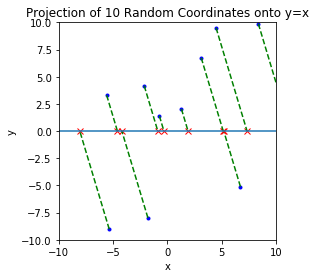

In [24]:
a = 0.3

x = ((np.random.rand(10)*2)-1)*10
y = ((np.random.rand(10)*2)-1)*10
pair = zip(x, y)

# The projection matrix
P = np.array([[1, a],
              [0, 0]])

for item in pair:
    x, y = item

    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # Project z onto the line y = 0
    Pz = P @ z

    # Plot the result
    plt.plot(x, y, 'b.')
    plt.plot(Pz[0], Pz[1], 'rx')
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed')

plt.plot([-10,10],[0,0])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.title("Projection of 10 Random Coordinates onto y=0")
plt.show()

In [28]:
def update(x, y, a):
    """
    Projects the point (x, y) onto the line y=0 and updates a plot.
    """
    # Form the vector z in R2 from the point (x, y)
    z = np.array([[x],
                  [y]])

    # The projection matrix
    P = np.array([[1, a],
                [0, 0]])

    # Project z onto the line y = x
    Pz = P @ z

    # Plot the result
    plt.plot([x,Pz[0]],[y,Pz[1]],color='green', linestyle='dashed', linewidth = 3, 
            marker='o', markerfacecolor='blue', markersize=8)
    plt.plot([-10,10],[0,0])
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.axis('square')
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

widgets.interact(update, x=widgets.FloatSlider(value=-5, min=-10, max=10, step=0.1, description='x'), y=widgets.FloatSlider(value=8, min=-10, max=10, step=0.1, description='y'), a=widgets.FloatSlider(value=0.1, min=-3, max=3, step=0.1, description='alpha'))

A Jupyter Widget

<function __main__.update>

## An Engineering Application

### Example 1

If we are given a point $x \in S$, suppose that we would like to approximate $x$ with a point in $V \subset S$. Assuming that $x \notin V$, we need to find the point in $V$ that is closest to $x$; that is, $\hat{x}$. This point is given by the orthogonal projection of $x$ onto $V$. 

In this example, let $V$ be the plane in $\mathbb{R}^3$ spanned by the vectors 

$$
  y = \left[ {\begin{array}{c}
   1  \\
   0  \\
   1  \\
  \end{array} } \right]

\textrm{and }

  z =\left[ {\begin{array}{c}
   0 \\
    1 \\
    1 \\
  \end{array} } \right]
$$.

If 

$$
A=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
   1 & 1 \\
  \end{array} } \right]
$$

then the projection matrix that projects points in $\mathbb{R}^3$ orthogonally onto the plane spanned by $y$ and $z$ is described by $P = A(A^HA)^{-1}A^H$. Note that the columns of $A$ are the vectors that span $V$. In the python code below, we project the vector 

$$
  q =\left[ {\begin{array}{c}
   7 \\
    8 \\
    9 \\
  \end{array} } \right]
$$

onto the plane $V = span(y,z)$, and get 

$$
  \hat{x} = Pq =\left[ {\begin{array}{c}
   5 \\
    6 \\
    11 \\
  \end{array} } \right]
$$.

This vector is the closest approximation of $q$ on $V$.

In [14]:
A = np.array([[1, 0],
              [0, 1],
              [1, 1]])

P = A @ np.linalg.inv(A.conj().T @ A) @ A.conj().T
print('Projection matrix:')
print(P, "\n")

q = np.array([[7],
              [8],
              [9]])
Pq = P @ q
print('Closest approximation in V:')
print(Pq)

Projection matrix:
[[ 0.66666667 -0.33333333  0.33333333]
 [-0.33333333  0.66666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]] 

Closest approximation in V:
[[  5.]
 [  6.]
 [ 11.]]


A Jupyter Widget

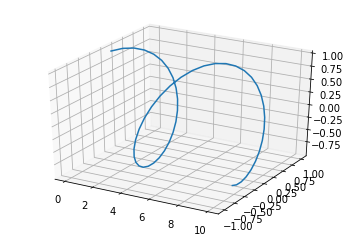

In [19]:
# slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='Slope')
# display(slider)

def plot(m):
    x = np.linspace(-10, 10)
    plt.plot(x, m*x)
    plt.show()

widgets.interact(plot, m=widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='Slope'))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 10)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, z)
plt.show()